In [68]:
import pandas as pd
import geopandas as gpd
# from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import plotly.express as px
import basedosdados as bd
import sqlite3 as sqlite

In [19]:
dbpath = 'cities.db' 

# Create connection and load spatialite extension
con = sqlite.connect(dbpath)
con.enable_load_extension(True)
con.execute('SELECT load_extension("mod_spatialite")')

# SQL must wrap the geometry in hex(st_asbinary(...))
sql = "SELECT id, sigla_uf, name, Hex(ST_AsBinary(geometry)) as geom FROM cities;"
df = gpd.GeoDataFrame.from_postgis(sql, con, geom_col="geom")

In [41]:
life_exp = bd.read_sql(
    '''
    SELECT id_municipio AS id, expectativa_vida
    FROM  basedosdados.mundo_onu_adh.municipio
    WHERE ano = 2010
    ''',
    billing_project_id='adameplayground')

Downloading: 100%|██████████| 5565/5565 [00:00<00:00, 18109.10rows/s]


In [48]:
cities_health = pd.merge(gdf, life_exp, how='inner', on='id')

In [51]:
rj_health = cities_health[cities_health['sigla_uf'] == 'RJ']

In [52]:
rj_health

,id,sigla_uf,name,geom,expectativa_vida
2350,3300100,RJ,Angra dos Reis,"POLYGON ((-44.19557 -23.09831, -44.19445 -23.1...",75.75
2351,3300233,RJ,Armação dos Búzios,"POLYGON ((-41.93436 -22.76580, -41.91900 -22.7...",74.44
2352,3300258,RJ,Arraial do Cabo,"POLYGON ((-42.23767 -22.86367, -42.23403 -22.8...",73.31
2353,3300308,RJ,Barra do Piraí,"POLYGON ((-43.97101 -22.32489, -43.96619 -22.3...",74.14
2354,3300456,RJ,Belford Roxo,"POLYGON ((-43.36512 -22.68504, -43.35048 -22.6...",73.50
...,...,...,...,...,...
5253,3305901,RJ,Trajano de Moraes,"POLYGON ((-42.15535 -22.00962, -42.14765 -22.0...",73.77
5254,3306008,RJ,Três Rios,"POLYGON ((-43.14554 -22.09725, -43.13612 -22.1...",73.03
5255,3306156,RJ,Varre-Sai,"POLYGON ((-41.75527 -20.80706, -41.75000 -20.8...",73.58
5256,3306206,RJ,Vassouras,"POLYGON ((-43.45624 -22.21610, -43.43097 -22.2...",73.79


<AxesSubplot:>

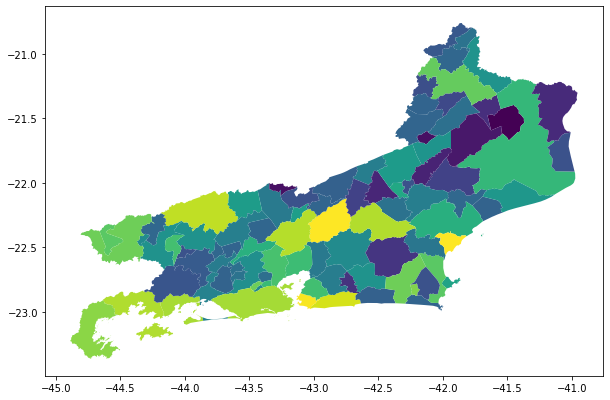

In [56]:
rj_health.plot(column ='expectativa_vida',figsize= (10,10))

In [71]:
rj_health.to_csv('rj_health.gzip', compression = 'gzip')

In [20]:
gdf = gpd.GeoDataFrame.from_postgis('SELECT id, sigla_uf, name, Hex(ST_AsBinary(geometry)) as geom FROM cities', con, geom_col='geom')

<AxesSubplot:>

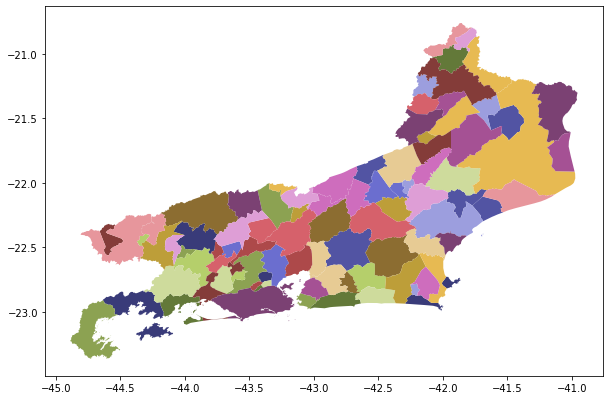

In [38]:
gdf[gdf['sigla_uf']== 'RJ'].plot(figsize= (10,10),cmap='tab20b')

In [70]:
fig = px.choropleth(rj_health,
                   geojson = rj_health["geom"],
                   locations = rj_health.index,
                   color = "expectativa_vida",
                   hover_name = "name",
                   hover_data = ["expectativa_vida"],#, "death_rate"],
                   labels = {
                       "expectativa_vida": "Life Expectancy"
                   },
                   color_continuous_scale = "sunsetdark",
                   range_color=(0, 0.15),
                   #animation_frame = 'date',
)

fig.update_geos(
                projection=dict(
                    scale=55
                    ),
                center = dict(
                    lat=-22.208333,
                    lon=-42.896388
                    )
)

fig.show(renderer='notebook_connected')